## Import Python Libraries

In [1]:
import pandas as read_data
import numpy as np
import matplotlib.pyplot as GraphView
import seaborn as sns_view
from wordcloud import WordCloud as WordCloudGraph
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import Dataset

In [3]:
FashionData = read_data.read_csv('D:/FashionData.csv')
FashionData.head()

,Post_id,Fashion Brand,Instagram Handle,Customer Feedback,Date,Location,Hashtag,Sentiment
0,1,Zara,@zaraofficial,Love the new collection! ??,5/10/2020,"London, UK",#Fashion #Style,Positive
1,2,H&M,@hm,The quality is so poor. ??,11/15/2019,"Manchester, UK",#Disappointed,Negative
2,3,Burberry,@burberry,Neutral designs.,8/22/2022,"Birmingham, UK",#Classic,Neutral
3,4,ASOS,@asos,Amazing deals on the website! ???,6/5/2021,"Glasgow, UK",#Sale #Fashion,Positive
4,5,Topshop,@topshop,Not as trendy as before.,1/17/2023,"Edinburgh, UK",#VintageVibes,Negative


In [4]:
FashionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Post_id            550 non-null    int64 
 1   Fashion Brand      550 non-null    object
 2   Instagram Handle   550 non-null    object
 3   Customer Feedback  550 non-null    object
 4   Date               550 non-null    object
 5   Location           550 non-null    object
 6   Hashtag            550 non-null    object
 7   Sentiment          550 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.5+ KB


In [5]:
FashionData.isnull().sum()

Post_id              0
Fashion Brand        0
Instagram Handle     0
Customer Feedback    0
Date                 0
Location             0
Hashtag              0
Sentiment            0
dtype: int64

## Data Preprocessing

In [6]:
stopwordsset = set(stopwords.words('english'))
def preprocess_text(textmsg):
    wordset = word_tokenize(textmsg)
    wordset = [words.lower() for words in wordset if words.isalpha() and words.lower() not in stopwordsset]
    return ' '.join(wordset)

In [7]:
FashionData['Processed_Feedback'] = FashionData['Customer Feedback'].apply(preprocess_text)
FashionData.head()

,Post_id,Fashion Brand,Instagram Handle,Customer Feedback,Date,Location,Hashtag,Sentiment,Processed_Feedback
0,1,Zara,@zaraofficial,Love the new collection! ??,5/10/2020,"London, UK",#Fashion #Style,Positive,love new collection
1,2,H&M,@hm,The quality is so poor. ??,11/15/2019,"Manchester, UK",#Disappointed,Negative,quality
2,3,Burberry,@burberry,Neutral designs.,8/22/2022,"Birmingham, UK",#Classic,Neutral,neutral designs
3,4,ASOS,@asos,Amazing deals on the website! ???,6/5/2021,"Glasgow, UK",#Sale #Fashion,Positive,amazing deals website
4,5,Topshop,@topshop,Not as trendy as before.,1/17/2023,"Edinburgh, UK",#VintageVibes,Negative,trendy


## Data Visualization

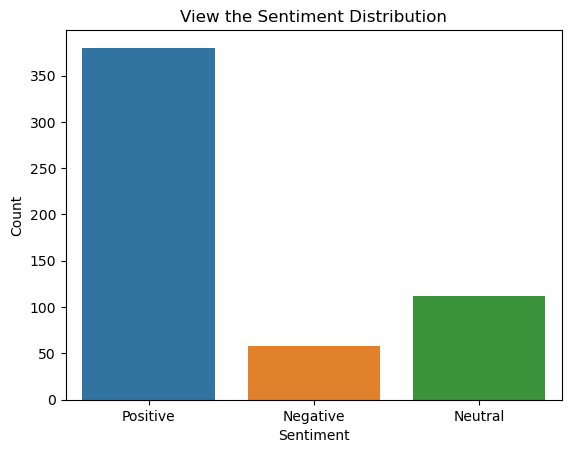

In [8]:
sns_view.countplot(x='Sentiment', data=FashionData)
GraphView.title('View the Sentiment Distribution')
GraphView.xlabel('Sentiment')
GraphView.ylabel('Count')
GraphView.show()

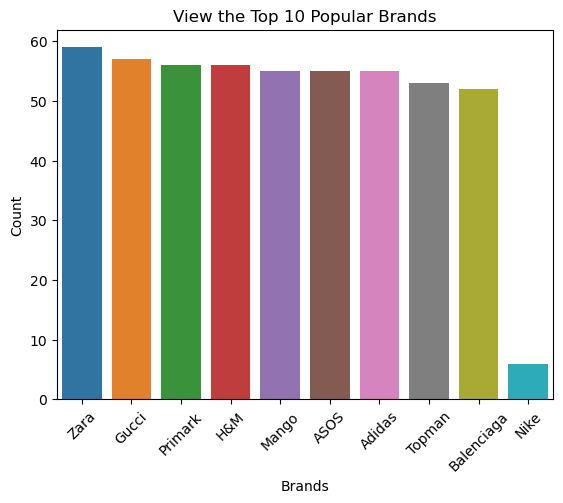

In [9]:
top_brands = FashionData['Fashion Brand'].value_counts()[:10]
sns_view.barplot(x=top_brands.index, y=top_brands.values)
GraphView.title('View the Top 10 Popular Brands')
GraphView.xlabel('Brands')
GraphView.ylabel('Count')
GraphView.xticks(rotation=45)
GraphView.show()

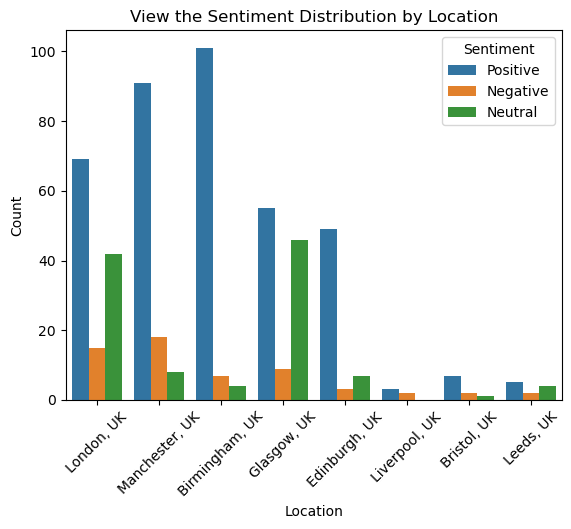

In [10]:
sns_view.countplot(x='Location', data=FashionData, hue='Sentiment')
GraphView.title('View the Sentiment Distribution by Location')
GraphView.xlabel('Location')
GraphView.ylabel('Count')
GraphView.xticks(rotation=45)
GraphView.legend(title='Sentiment')
GraphView.show()

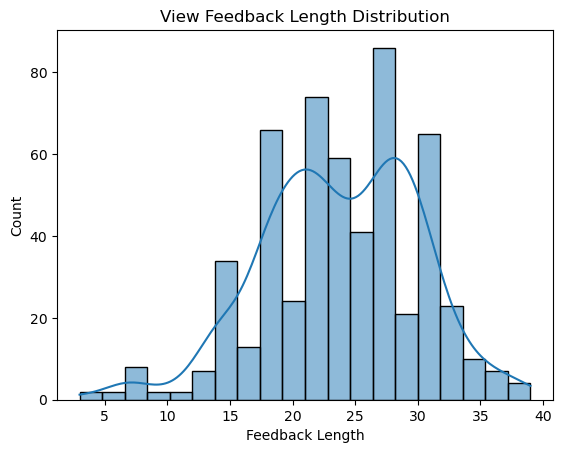

In [11]:
FashionData['Feedback_Length'] = FashionData['Processed_Feedback'].apply(len)
sns_view.histplot(data=FashionData, x='Feedback_Length', bins=20, kde=True)
GraphView.title('View Feedback Length Distribution')
GraphView.xlabel('Feedback Length')
GraphView.ylabel('Count')
GraphView.show()

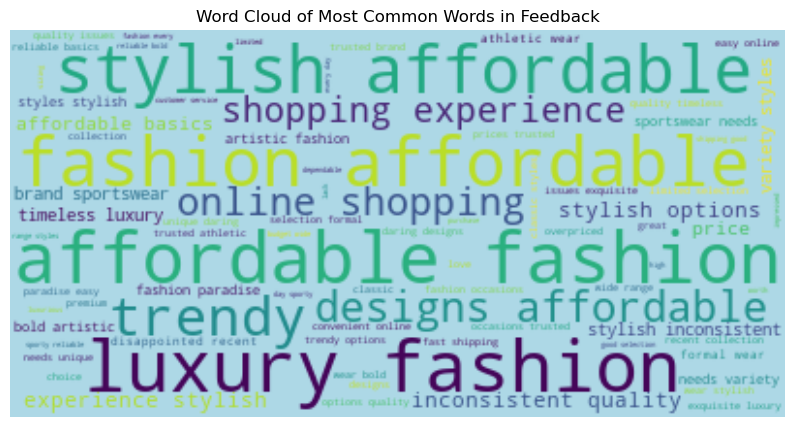

In [12]:
GraphView.figure(figsize=(10, 6))
wordplot = WordCloudGraph(background_color='lightblue').generate(' '.join(FashionData['Processed_Feedback']))
GraphView.imshow(wordplot, interpolation='bilinear')
GraphView.title('Word Cloud of Most Common Words in Feedback')
GraphView.axis('off')
GraphView.show()

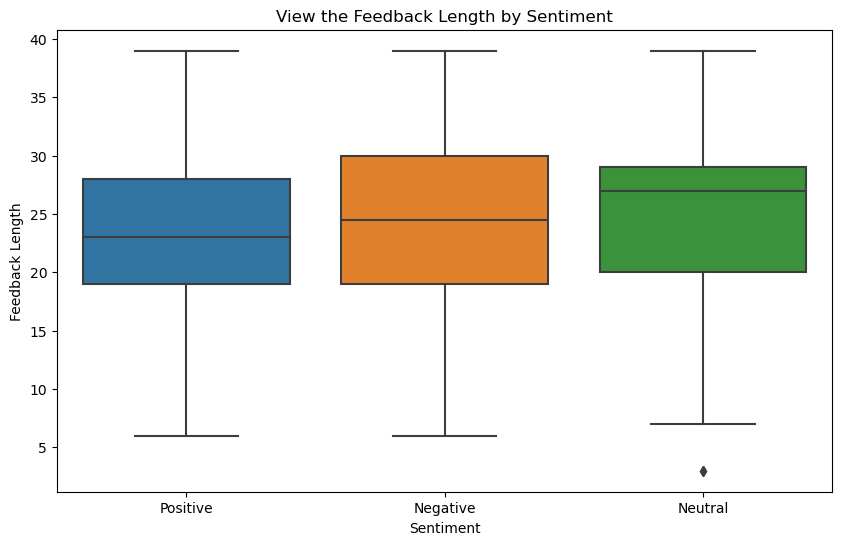

In [13]:
GraphView.figure(figsize=(10, 6))
sns_view.boxplot(x='Sentiment', y='Feedback_Length', data=FashionData)
GraphView.title('View the Feedback Length by Sentiment')
GraphView.xlabel('Sentiment')
GraphView.ylabel('Feedback Length')
GraphView.show()

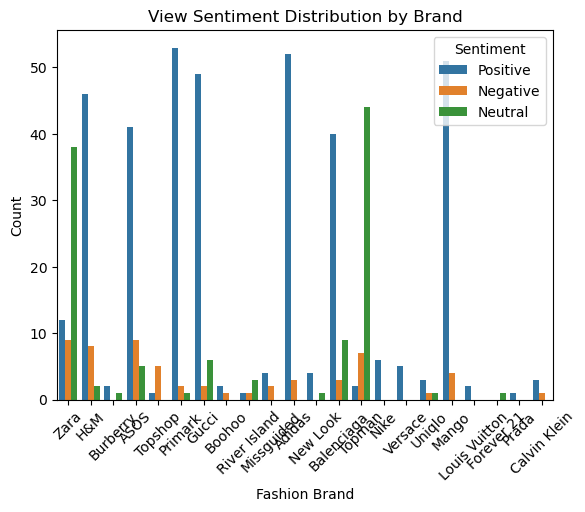

In [14]:
sns_view.countplot(x='Fashion Brand', data=FashionData, hue='Sentiment')
GraphView.title('View Sentiment Distribution by Brand')
GraphView.xlabel('Fashion Brand')
GraphView.ylabel('Count')
GraphView.xticks(rotation=45)
GraphView.legend(title='Sentiment')
GraphView.show()

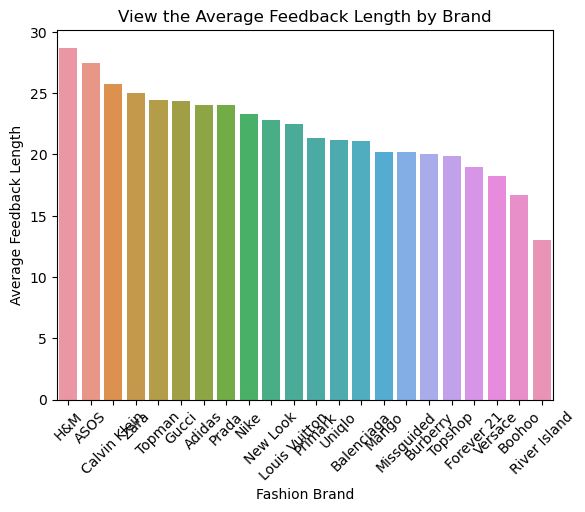

In [15]:
avg_feedback_length_by_brand = FashionData.groupby('Fashion Brand')['Feedback_Length'].mean().sort_values(ascending=False)
sns_view.barplot(x=avg_feedback_length_by_brand.index, y=avg_feedback_length_by_brand.values)
GraphView.title('View the Average Feedback Length by Brand')
GraphView.xlabel('Fashion Brand')
GraphView.ylabel('Average Feedback Length')
GraphView.xticks(rotation=45)
GraphView.show()

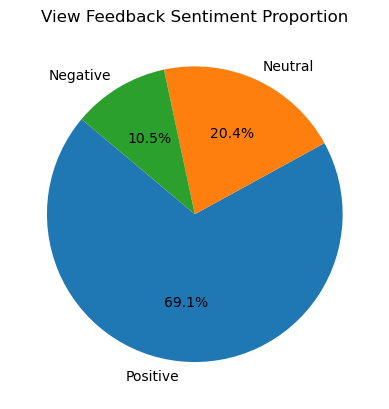

In [16]:
# 11. Feedback Sentiment Proportion Pie Chart
sentiment_counts = FashionData['Sentiment'].value_counts()
GraphView.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
GraphView.title('View Feedback Sentiment Proportion')
GraphView.show()

## Data Splitting

In [17]:
Xset = FashionData['Processed_Feedback']
Yset = FashionData['Sentiment']

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xset, Yset, test_size=0.2, random_state=42)

## Feature Extraction: Text Tokenization and Padding

In [19]:
token = Tokenizer(num_words=10000) # The maximum amount of words one ought to retain
token.fit_on_texts(Xtrain)

In [20]:
Xtrainingset_sequence = token.texts_to_sequences(Xtrain)
Xtesting_sequence = token.texts_to_sequences(Xtest)
vocab_size = len(token.word_index) + 1
maximum_length_calc = max([len(sequence) for sequence in Xtrainingset_sequence]) # calculate the Maximum sequence length
Padded_X_train = pad_sequences(Xtrainingset_sequence, maxlen=maximum_length_calc, padding='post')
Padded_X_test = pad_sequences(Xtesting_sequence, maxlen=maximum_length_calc, padding='post')

## Model Development

In [21]:
LSTMModel = Sequential()
LSTMModel.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=maximum_length_calc))
LSTMModel.add(LSTM(units=128))
LSTMModel.add(Dense(units=3, activation='softmax'))
LSTMModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LSTMModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 100)            17000     
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 134635 (525.92 KB)
Trainable params: 134635 (525.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Training

In [22]:
ytrain_category = to_categorical(ytrain.map({'Positive': 0, 'Neutral': 1, 'Negative': 2}))
ytest_category = to_categorical(ytest.map({'Positive': 0, 'Neutral': 1, 'Negative': 2}))
# Train the model using train dataset with epochs 100
LSTMModelhistory=LSTMModel.fit(Padded_X_train, ytrain_category, epochs=100, batch_size=64, validation_split=0.1)

Epoch 1/100
7/7 [==============================] - 2s 80ms/step - loss: 1.0558 - accuracy: 0.6869 - val_loss: 1.0083 - val_accuracy: 0.5909
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.9200 - accuracy: 0.6995 - val_loss: 0.8859 - val_accuracy: 0.5909
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7263 - accuracy: 0.6995 - val_loss: 0.7866 - val_accuracy: 0.5909
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.5985 - accuracy: 0.6995 - val_loss: 0.6481 - val_accuracy: 0.6364
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4632 - accuracy: 0.7803 - val_loss: 0.5297 - val_accuracy: 0.8636
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3660 - accuracy: 0.8409 - val_loss: 0.4697 - val_accuracy: 0.7045
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3187 - accuracy: 0.8308 - val_loss: 0.4191 - val_accuracy: 0.7727
Epoch 8/100
7/7 [===

## Model Evaluation

In [23]:
# Model Evaluation
LSTMModelloss, LSTMModelaccuracy = LSTMModel.evaluate(Padded_X_test, ytest_category)
print("LSTM Model - Test Loss:", LSTMModelloss)
print("LSTM Model - Test Accuracy:", LSTMModelaccuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.7534 - accuracy: 0.8636
LSTM Model - Test Loss: 0.7533951997756958
LSTM Model - Test Accuracy: 0.8636363744735718


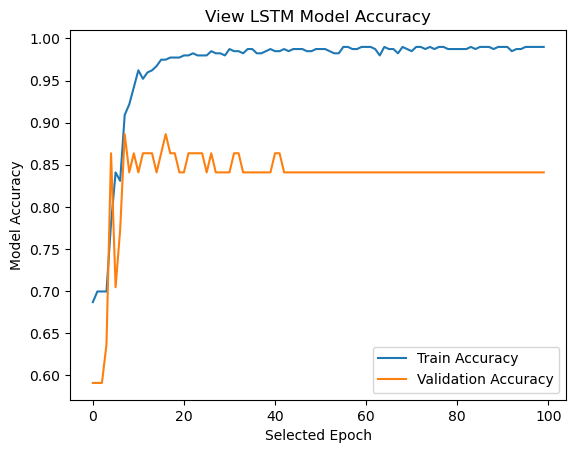

In [24]:
# View the Model Training / Validation Accuracy
GraphView.plot(LSTMModelhistory.history['accuracy'], label='Train Accuracy')
GraphView.plot(LSTMModelhistory.history['val_accuracy'], label='Validation Accuracy')
GraphView.title('View LSTM Model Accuracy')
GraphView.xlabel('Selected Epoch')
GraphView.ylabel('Model Accuracy')
GraphView.legend()
GraphView.show()

## Testing the LSTM Model for Sentiment Prediction

In [27]:
def predict_customer_sentiment(feedback, brand):
    processed_text = preprocess_text(feedback)
    textseq = token.texts_to_sequences([processed_text])
    padded_seq = pad_sequences(textseq, maxlen=maximum_length_calc, padding='post')
    sentiment_probabilities = LSTMModel.predict(padded_seq)[0]
    sentiment_classes = ['Positive', 'Neutral', 'Negative']
    predicted_sentiment = sentiment_classes[np.argmax(sentiment_probabilities)]
    return f"Predicted Sentiment for {brand}: {predicted_sentiment}"
user_feedback = input("Enter the customer feedback: ")
user_brand = input("Enter the Brand name: ")
predicted_result = predict_customer_sentiment(user_feedback, user_brand)
print(predicted_result)

Enter the customer feedback: Impressed with the new collection.
Enter the Brand name: Zara
1/1 [==============================] - 0s 17ms/step
Predicted Sentiment for Zara: Positive
